In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
%matplotlib inline

sns.set()

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data) 

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)

    # Return entry [0,1]
    return corr_mat[0,1]

def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))
    
    #reset indexes to make the slicing below work
    x = x.reset_index(drop=True)
    y = y.reset_index(drop=True)

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        print(bs_inds)
        print(type(bs_inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

<b>The vote for the Civil Rights Act in 1964</b>

The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

To answer this question, you will evaluate the hypothesis that the party of a House member has no bearing on his or her vote. You will use the fraction of Democrats voting in favor as your test statistic and evaluate the probability of observing a fraction of Democrats voting in favor at least as small as the observed fraction of 153/244. (That's right, at least as small as. In 1964, it was the Democrats who were less progressive on civil rights issues.) To do this, permute the party labels of the House voters and then arbitrarily divide them into "Democrats" and "Republicans" and compute the fraction of Democrats voting yea.

In [3]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True]*136 + [False]*35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0001


This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

<b>A time-on-website analog</b>

It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog A and "after" = Frog B. Let's practice this again with something that is actually a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays nht_dead and nht_live, where "nht" is meant to stand for "no-hitter time."

In [4]:
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])
nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [5]:
# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
nht_diff_obs = diff_of_means(nht_dead, nht_live)

# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)


# Compute and print the p-value: p
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-val =',p)

p-val = 0.0001


Your p-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.

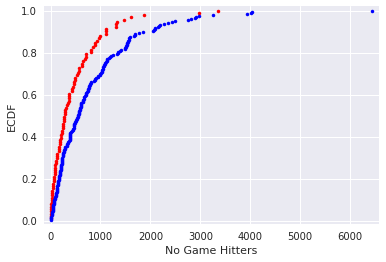

In [6]:
# Create and plot ECDFs from data
x_1, y_1 = ecdf(nht_dead)
x_2, y_2 = ecdf(nht_live)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('No Game Hitters')
_ = plt.ylabel('ECDF')
plt.show()

<b>Hypothesis test on Pearson correlation</b>

The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

In [7]:
df_f = pd.read_csv('data/female_literacy_fertility.csv')
df_f['illiteracy'] = 100-df_f['female literacy']
illiteracy = df_f['illiteracy']
fertility = df_f['fertility']

In [8]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
num_tests = 100000
perm_replicates = np.empty(num_tests)

# Draw replicates
for i in range(num_tests):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


You got a p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

<b>Do neonicotinoid insecticides have unintended consequences?</b>

As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, you will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

First, we will do EDA, as usual. Plot ECDFs of the alive sperm count for untreated bees (stored in the Numpy array control) and bees treated with pesticide (stored in the Numpy array treated).

In [9]:
df_b = pd.read_csv('data/bee_sperm2.csv')
control = df_b[df_b['Treatment'] == 'Control']['Sperm Volume per 500 ul']
treated = df_b[df_b['Treatment'] == 'Pesticide']['Sperm Volume per 500 ul']

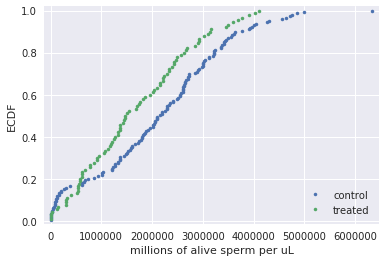

In [10]:
# Compute x,y values for ECDFs
x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

# Plot the ECDFs
plt.plot(x_control, y_control, marker='.', linestyle='none')
plt.plot(x_treated, y_treated, marker='.', linestyle='none')

# Set the margins
plt.margins(0.02)

# Add a legend
plt.legend(('control', 'treated'), loc='lower right')

# Label axes and show plot
plt.xlabel('millions of alive sperm per uL')
plt.ylabel('ECDF')
plt.show()


This shows the treated bees have less alive sperm

<b>Bootstrap hypothesis test on bee sperm counts</b>

Now, you will test the following hypothesis: On average, male bees treated with neonicotinoid insecticide have the same number of active sperm per milliliter of semen than do untreated male bees. You will use the difference of means as your test statistic.

In [11]:
# Compute the difference in mean sperm count: diff_means
diff_means = np.mean(control) - np.mean(treated)

# Compute mean of pooled data: mean_count
mean_count = np.mean(np.concatenate((control,treated)))

# Generate shifted data sets
control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

# Generate bootstrap replicates
bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_reps_control - bs_reps_treated

# Compute and print p-value: p
p = np.sum(bs_replicates >= np.mean(control) - np.mean(treated)) \
            / len(bs_replicates)
print('p-value =', p)

p-value = 0.0032


The p-value is small, most likely less than 0.003, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed.

<h2>Wrapping-Up</h2>

In [12]:
df_75 = pd.read_csv('data/finch_beaks_1975.csv')
df_12 = pd.read_csv('data/finch_beaks_2012.csv')

df_75['year'] = 1975
df_12['year'] = 2012

df_75.columns = ['band','species','blength','bdepth','year']

df = pd.concat((df_75, df_12), ignore_index=True)
print(df.head())
print(df.info())
print(df.describe())
print(df.describe(include = ['O']))

df_scandens = df[df['species'] == 'scandens']
df_fortis = df[df['species'] == 'fortis']

bd_1975 = df_scandens[df_scandens['year'] == 1975]['bdepth']
bd_2012 = df_scandens[df_scandens['year'] == 2012]['bdepth']

bl_1975 = df_scandens[df_scandens['year'] == 1975]['blength']
bl_2012 = df_scandens[df_scandens['year'] == 2012]['blength']

   band species  blength  bdepth  year
0     2  fortis      9.4     8.0  1975
1     9  fortis      9.2     8.3  1975
2    12  fortis      9.5     7.5  1975
3    15  fortis      9.5     8.0  1975
4   305  fortis     11.5     9.9  1975
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 651 entries, 0 to 650
Data columns (total 5 columns):
band       651 non-null int64
species    651 non-null object
blength    651 non-null float64
bdepth     651 non-null float64
year       651 non-null int64
dtypes: float64(2), int64(2), object(1)
memory usage: 25.5+ KB
None
               band     blength      bdepth         year
count    651.000000  651.000000  651.000000   651.000000
mean    8824.215054   11.588618    9.040952  1989.095238
std     9586.864492    1.659108    0.735171    17.981790
min        2.000000    8.700000    7.200000  1975.000000
25%      571.500000   10.300000    8.500000  1975.000000
50%      923.000000   11.000000    9.000000  1975.000000
75%    19659.000000   13.100000    9.600

<b>EDA of beak depths of Darwin's finches</b>

For your first foray into the Darwin finch data, you will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

In the next few problems, you will look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012. To start with, let's plot all of the beak depth measurements in 1975 and 2012 in a bee swarm plot.

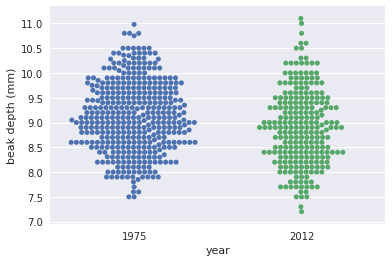

In [13]:
# Create bee swarm plot
_ = sns.swarmplot(data = df, x = 'year', y = 'bdepth')

# Label the axes
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

# Show the plot
plt.show()

It is kind of hard to see if there is a clear difference between the 1975 and 2012 data set. Eyeballing it, it appears as though the mean of the 2012 data set might be slightly higher, and it might have a bigger variance.

<b>ECDFs of beak depths</b>

While bee swarm plots are useful, we found that ECDFs are often even better when doing EDA. Plot the ECDFs for the 1975 and 2012 beak depth measurements on the same plot.

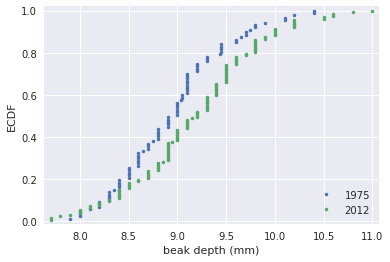

In [14]:
# Compute ECDFs
x_1975, y_1975 = ecdf(bd_1975)
x_2012, y_2012 = ecdf(bd_2012)

# Plot the ECDFs
_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

# Set margins
plt.margins(0.02)

# Add axis labels and legend
_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

# Show the plot
plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

<b>Parameter estimates of beak depths</b>

Estimate the difference of the mean beak depth of the G. scandens samples from 1975 and 2012 and report a 95% confidence interval.

In [15]:
# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Get bootstrap replicates of means
bs_replicates_1975 = draw_bs_reps(bd_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012, np.mean, 10000)

# Compute samples of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute 95% confidence interval: conf_int
conf_int = np.percentile(bs_diff_replicates, [2.5, 97.5])

# Print the results
print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.06314452 0.38695626] mm


<b>Hypothesis test: Are beaks deeper in 2012?</b>

Your plot of the ECDF and determination of the confidence interval make it pretty clear that the beaks of G. scandens on Daphne Major have gotten deeper. But is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [16]:
# Compute mean of combined data set: combined_mean
combined_mean = np.mean(np.concatenate((bd_1975, bd_2012)))

# Compute the difference of the sample means: mean_diff
mean_diff = np.mean(bd_2012) - np.mean(bd_1975)

# Shift the samples
bd_1975_shifted = bd_1975 - np.mean(bd_1975) + combined_mean
bd_2012_shifted = bd_2012 - np.mean(bd_2012) + combined_mean

# Get bootstrap replicates of shifted data sets
bs_replicates_1975 = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

# Compute replicates of difference of means: bs_diff_replicates
bs_diff_replicates = bs_replicates_2012 - bs_replicates_1975

# Compute the p-value
p = np.sum(bs_diff_replicates >= mean_diff) / len(bs_diff_replicates)

# Print p-value
print('p =', p)

p = 0.0031


We get a p-value of 0.0037, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are! In the previous exercise, you got a difference of 0.2 mm between the means. You should combine this with the statistical significance. Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

<b>EDA of beak length and depth</b>

The beak length data are stored as bl_1975 and bl_2012, again with units of millimeters (mm). You still have the beak depth data stored in bd_1975 and bd_2012. Make scatter plots of beak depth (y-axis) versus beak length (x-axis) for the 1975 and 2012 specimens.

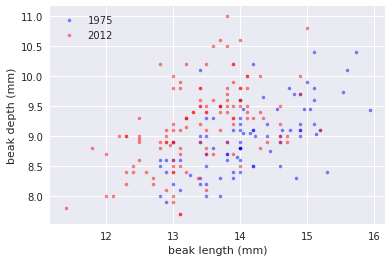

In [17]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Show the plot
plt.show()

Great work! In looking at the plot, we see that beaks got deeper (the red points are higher up in the y-direction), but not really longer. If anything, they got a bit shorter, since the red dots are to the left of the blue dots. So, it does not look like the beaks kept the same shape; they became shorter and deeper.

<b>Linear regressions</b>

Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

In [18]:
# Compute the linear regressions
slope_1975, intercept_1975 = np.polyfit(bl_1975, bd_1975, 1)
slope_2012, intercept_2012 = np.polyfit(bl_2012, bd_2012, 1)

# Perform pairs bootstrap for the linear regressions
bs_slope_reps_1975, bs_intercept_reps_1975 = draw_bs_pairs_linreg(bl_1975, bd_1975, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = draw_bs_pairs_linreg(bl_2012, bd_2012, 1000)

# Compute confidence intervals of slopes
slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])
intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])

intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])


# Print the results
print('1975: slope =', slope_1975,
      'confidence int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'confidence int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'confidence int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'confidence int =', intercept_conf_int_2012)

[66 12 58 40 36 63 20 56 59 83 63 34 17 19 12  0  5 47 66 37 23 61 20 70
 42 81 59 81 43 15 48 52 70 25 11 28  1 60 74 11  6  9  0 42 65 62 38  4
 59 57 20 46 24 56 82 26 55 18 22 60 11  6 67 77 71 64 19 14  9 55 37 75
 74 27 42 62 22 86 71 15 78 43 22 11 22 74 48]
<class 'numpy.ndarray'>
[52 17 70 21 14 72 24 41 69 77  8  4 76 43 40 34 33 48 32  1 36 69  8 24
 56 20 69 24 74 40 85  6 78 65 46 36 49 14 83 81  6 46 45 37 68  1 31 60
 12 82 72 54  6 30 62  4 10 31 34 17 13 71  4 56  3 75 85 82  7 58 80 73
 49 16 57 19 71 74 15 45 46 40 32 28 72 27 31]
<class 'numpy.ndarray'>
[79 71 32  0 60 27 59 48 81 56 50 54  1 77 22 35  0 56 85 30 54 23 33 41
 19  0 52 60 63 74 17 70 17 62 23 32 57 16 53 83 49 49 68 17 12 24 71 48
 41 85 82 31 14 43 15 39 74  7 81 43 43 21 70 66 15 40 69 83 47 71 79 57
 11 13  9 75  8 37 81 39 26 47 23 64 74 78 23]
<class 'numpy.ndarray'>
[70 81 80 86 62 57 25 11 50 65  1 18 57 86 17 71 13 61 65 54 77 53 81 83
 85  3 12 20  2 34 61 68  1 39 51 22 30 21 23 16  2 80 31

 60 45 21 78 47  3 16 73 74 37 57 67 81  9 54]
<class 'numpy.ndarray'>
[85 53 69 16  1 79 17 49 58  8  8 57 25 38 65 63 37 29 50  4  8 17 12  6
 22 66 31 39 68 79 31 45  0 62 43 53 22 63 41 13  6 81 16 31 51 13 83 12
  5 33 49 29 35 59 14 25 79 18 51 31 16 10 58 79 10  3 61 84 72 75 23 47
 58  3 71 60 83 86 36 33 85 32 24 68 35  7 58]
<class 'numpy.ndarray'>
[57 61 50 81 17 68  9 29 61 70 74 34 75 46 75 12 13 56 40 47 53 57 59 20
 75 86 38  8 25 67 56 18 82 78 65 61 38 74 31 65 15 12 53 65 43  0  6 79
 19 77 48 33 36 84 76 23 18 66 44 30 15 46 50 44  7 11  9 61 49  3 23  4
 59 58 26 68  2 64 42 37  6 84  3 11 14 15 84]
<class 'numpy.ndarray'>
[40 34 84 86 13 44 34 63 17 24 56 28 14 13 51 11 23 22 13 57 13  7 24 77
 60 69 53 75 61 43  3 74 20 54 31 81 10 26 51  4 40 17 69  9 55 68 29 46
 49 56 48 21 49 60 51 24  5 86 77 26 44 77 59 26 81 49 11 81 19 51 69 83
 24 64 39 30 20 12 78 18 11 40 86  9 26 76 12]
<class 'numpy.ndarray'>
[23 75 19 70 66 85  3 10  0 86 56  4  3 43 68 14 34  0 53  

 59 43 52 76 42 75 38 49 79 71 25 83 28 72 84]
<class 'numpy.ndarray'>
[66 12 50 72 42 59 34 25 78 23 38 45 80 53 83  6 49 53  4 15 34 70  3 18
 15 68 24 33 73 12 49 55 71 23 70 23  7 79 83 18 27 64 36 55 15 49 21 76
 37 74 75 71 66 53 70 69 73 18 18 36  6 72 21 20 67 44 17 38  0 68 28 54
 68 65 36 84  3 26 63 30 75 67 48 35 83  2 22]
<class 'numpy.ndarray'>
[22 69 48 57 75 27 22 77 58  2 38 18 51 43 23 15 59 64  6 46 30 72 84 43
  8 67 24 54  9 26 65  4 25 45 74 27 68 36 36 51 81 23 37 59  8 58 49 31
 30 59 75 23 20 48 60 40 79 73 69 47 46  9 26 62 58 45 64 80 65 58 10 69
 76 69 47 35 24  8 17 26 29 25 49 52 86  7 53]
<class 'numpy.ndarray'>
[42 72 33 45 79  4 37 39 26 68  9 19  0 67 67 13 68 27 83 76 68 56 12 40
 36 57 45 70 85 15 79 31 65 84 16 74 69 57 40 30 80 47 62 32 75 12 79 12
 17 49 38 20  1 39 33  8 77  9  9 13 61  4 12  2 75 23 86 30 70 51  4 70
 18 85 34 74 64 46 65 78 35 15 77 65  7 69  1]
<class 'numpy.ndarray'>
[45 35 20 59 37 85 11 61  6 26 66 72 21 32 79 33 12 86 27 5

  2 63 59 75 83  9 44 41 70 76 60 47 67 85 44]
<class 'numpy.ndarray'>
[42 81  0  7 82 86 42 69 70 28 33 35 24 35 28 53 81  0 81 63 56 76 59 50
 36 41 84 16 22 38 75  7 79 52 12 44 57 30 40 47  9 48 30 20 62 64 71 43
 49 11 34 42 45 52 48 41 68 38 26 75 51  8 77 21 22 77 65 35 78 14 48 34
 25 80 23 69 43 74 26 63 50 79 62 44 78 52 53]
<class 'numpy.ndarray'>
[66 29  6 25 16 50 61 45 50 74 81  3 30 37 12  1 60 37 49  2  1 43 19 84
  7 38 14 23  8 27 33  3 36 66 20 84 62 33 54 57 65 83 39  2 78 54 30 16
 24 31 68 70 58 41 72 68 26 15 35 77 34 55 56 47 71  3 17 23 74 70 60 12
  7 70 17 75 83 10  7 13 61 79 80 25 56 73 68]
<class 'numpy.ndarray'>
[47 74 43 82 76 80  7 71 65 16 48 49 26 80 63 29 44 36 15 86 25 69 36 19
 76  6 16 27 65 43 14 53 69 26 60  5 66  8 31  2 16 53 44 27  8 71 37 50
 72 71 51  7 51 85  5 14 17 10 28 56 61 72  8 16 47 46 35 28 53 15 84 41
 37 54 17 50 69 26 24 55 42 84 53 17 16 15  3]
<class 'numpy.ndarray'>
[23 65 67 43 35 65 71 58 14 25 19  7  9 19 39 73 57 44 57 6

[37 26 23 80 82 81 79 57 26 28 71 13 42 34 19 18  2 36 35 36 75 59  8 45
 32 60 34  1 35 35 44  1  7 40 39 34  2 72 13 78  1 36 60 41 84 73 35 10
 16 83 33 68 30 10 63 61 42  4 10 72 75 80 83 84 83 49 45  6 11 29 28 22
 10 20 34 14 24 62 15 57 35 14 74 24 21 24 27]
<class 'numpy.ndarray'>
[58 59 31 46 48 85 70 13 19 27  9 41 82 65 84 14 18 27 24 83 38 43  8  2
 14 77 47 25 73 42 57 67 27 32 78 77 36 86 39 13 62 41 54 59 45 61  7 85
 73  7 21  2 41 70 50 52  0 17 75 65 59 79 79 48  7 29 62 71 68 26 77 64
 25 41 79 62 34 79 16 27 75  0 12 83 71 81 53]
<class 'numpy.ndarray'>
[25 60 69 11 21 10 33 27  6 85 83 13 57 73  7 26 76 83 71 11 86 30 74 68
 30 76 49  7 59 73 55 78 20 70 72 35 46  6 40 71 37 53 69 61 29 76 73 69
 83 63  7 23 45 69 73  3 58 69 69 20 75  2 62 14 16 42 82 70 77 46  0 51
 57  8 50 10 74 52 58 41 19 76 52 45 28 48 69]
<class 'numpy.ndarray'>
[40 47 41 82 60 35 81 58 80 38 31 14 83 81 76 63 16 11 44 39 76 23 83 51
  2 41 28  2  3  5 26 12 71 39 50 19 38 76 41 68 18 83 47

 71 22  1 22 38 39 59 72 61 32 65  8 85 25 10]
<class 'numpy.ndarray'>
[56 31 19  5 61 60 65  8 54 39 73 22 85 63 31 58 55  9 74 79 19 49 84 52
 61 39 83 47 11 81 11 70 32 57 11 30  1 84 61 41 40 24 86 24 32 18 65 47
 42  2  9 14 44 58 14 79 10 26 78 33 74 34 18 36 54 39  7 55 63 74 74 35
 84 34  2 57 84 29 58 71 81 77 39  9 82 27 49]
<class 'numpy.ndarray'>
[45 53 85  7 40 25 59 41  7 51 59 50  2  9 54 83 55 50 72 42 23  6 64 79
 25  6 51 22 24 30 27 34 28 28 13 79 51 21 76 37  4 82 76  5 14 20 55 77
 41 49 34 74 38 63 66 55 52  6 80 72 31 59 36 26 47  6 23 20 20 17 58 34
 49 52  0 69 71 64 40 67 62 25 10 33 17 57 23]
<class 'numpy.ndarray'>
[24 46 20 19 13 55 53 49  3 55 12 32 63 82 10 29 17 69 35 46 48 76 67 55
 24 29 68 15 70 48 33 29 71 48 22 42 14 25 27 52 70 41 12 13 40 84 30 24
 56 49 72 84 37  2 78 22 80 15 51  0 28  9 33 70 63 15 71 75 53 25 86 30
 83 62 63 77  2 16 69 22 19 44 30 30 29 17 17]
<class 'numpy.ndarray'>
[55 17  6 11 53 10 31 13  2 21  0 86 72 20 21 76 56 80 68 4

 77 84 66 41 54 12 28 62 35 74 75  3 59 22 36]
<class 'numpy.ndarray'>
[21 59  0 17 61  5 20 65 84 73  8 56 80 77 17  9 12 10 21  0 50 79 55 19
 36  1 55 59 74 78  0 33 41 37 81 60 47  6 62  7 46 42 63 59 80 39 85  1
 40 67 81 80 44 45 40 16 64 85  1 35 50 64 37 42 18 57 39  3  3 46  0 78
 67 32 76 85 29 39 43 10  0 52 21 28 32 86 81]
<class 'numpy.ndarray'>
[ 7 78 13 42 11 13 24  1  4 17 63 84 30 38 28 49 54  0 37 20 12 13 71 19
 60 41 27 83 21 82 58 29 39 64  7 49 84  5 11 59 14 44 80 85 54 14 72 81
 14 32 81 18 10 54 51 48 29 43 21 34 46 56 27 79 75 25  9 49 40 83 46 17
  8 21 33 51 86 46 61 45 59 74 74 23 55  7 26]
<class 'numpy.ndarray'>
[24  8 27 16 49 13 59  0 54 80 52 67 54 43  1 79 11 31 41 73 82 81 55 82
 84 20 76 64 13 10 10 47 56 72 20 31  2 11  1 48 52 67 13 81 62 86 53 41
 80 41 58 57 41 31 35 14 80 73 21 40 34 61 75 63 20 30 37 70 80 83 52 62
 51 51 80 13  1 61  8 37 29 79 38 57 28 32 53]
<class 'numpy.ndarray'>
[ 3 60 68 40 38 86  0  8 35 74 13  3  6 62 15 42 64  3 23 2

[72 63 82  0 17 35 65 10 18 55 65 17 37 48 42 37 58 18 28  5  1  7 39 12
 35 35 66 49 28 48  9 40 68 75 43  2 35 79 28 85 49 55 60 33 71 69 24 53
 82 60 37 62 86 45 44 28 83 14 77 63 48 81 80  1 45 81 82  8 21 23  0 75
 65 44 13 43 15 59 56 60 10 60  6 76 15 41 30]
<class 'numpy.ndarray'>
[41 45 81 79  8 43  2 47 26 48 66 25 25  5  0 55 17 70 56 30 73 32 57 53
 35 48 84 48 77 37 84 64  8 43  8 32 86 37 14 77 79 69 40 55 33 21 83 25
 53  7 11 60 75 50  5 21 36 71 16 62 46 54 68 20 80 64  2 64 60 54  1 41
 57 75  7 23 29 13 45 44  6 18 13 11 42 56 29]
<class 'numpy.ndarray'>
[70  3 51 78 14 54  1 85 14 68 37 62 39 59 74 18 23 55 21 35 41 45 31  8
  4 68 72 57 82 49 61 85 66 57 83 13  7 19 84 37  1 24 69 13 77 51 57 75
 56 25 33 74 30 78 64  7 34 10 74 68 21 72 46 54 52 37 71 38 19 19 61 73
 26 56 69  1 55 52 66 44 79 19  2 78  5 58  2]
<class 'numpy.ndarray'>
[63  3 81 11  1 51  9 36 78 54 33 40 10 16 37 28 11 64 47 33 43 38  1 18
 19 69 55 77  9 19 46 50 38 43 56 86 67 20 24 36 53 10  8

[68 14 26 49 83 34 83 68 72 11 70 56 26 82 76 57 55 72  1 84 84 79 41 44
 26 72 75 68 69 65 84 75 10 22 23  7 54  3 78 47 27  0 84  5 65  0 26 30
 22 34 38 13 36 72 67 11 57 66  8 27 79 23 46 15 32 23 63 39  1 69  4 49
  5 78 78 26 10 70 33  6 18  1 21 84 64 28  7]
<class 'numpy.ndarray'>
[54 39 79 77 34 24 82 35 59 11  9 58  8 66 63 38 64 79 11 43 42  9 14  3
 71  6  2 18 84 56  5 28 31 17 39  1 22  9 57 78 82 37 17 37 27 29 83 19
 70 67 32 12 76 35 76 44 39 37  2  7  9 29 59  9 13 20 13 19  7 22 63 19
 19 74 46 23  6 71 82 21 51 83 33 45 42 75  7]
<class 'numpy.ndarray'>
[43  9 11 20 50  7 56 13 31 47 59 23 13 34 21 78 69 86 25 63  8 51 57 62
 49 48 60 59 20  6 30 61 56 37 40 45 63 50 67 75 65 18 79 86 41 58 61 63
 70 73 62 20 68 52 61 36  2 56 22  1 48 43  2  8 23 54 74 64 47 53 71 56
 17 18  6 13 63 77 33 54 86  3 23  4 77  6 81]
<class 'numpy.ndarray'>
[21 54 83 84 60 34 40 13  4 22 48 35  5 83 84 32 79  4 28 17 26  8 23  8
 51 83 60 45 82 33 55 39 81 48 84 59 17 38 64 18 37 48 17

 27  3 44 68 71 70 22 69 63  1 42 36 28 56 76]
<class 'numpy.ndarray'>
[10 73 82 60 13 41 63 62 53  3 15 16 71 85 17  3 48 62 21 27  1 42 26 69
 81 62 31 45 49 73  8 57 42 32 13 24 22  4 44 86 38 40 33 22 48 74 56  8
  0 82 85 20  6 13 58 50 23 31 18 50 31 70 14 84 34 45 71 53 45 72 74  3
 54 73 28 86 48 16 23 47 57 12 59 37 41 12 23]
<class 'numpy.ndarray'>
[16 64  3 82 36 64 25 60 65 70  4 39 16 46 46 60 24 61 27 16  4 30  1 22
 23 56 46  7 17 36 28 56 63 18 62 11  8 50  9 44 46 34 56  2 22 53 27 81
 77 69 78 11  5 54 22 50 22 44 23  5 66 10 62 11 18 18 54  9 84  0 24 53
 32 84 35 84 11 66 74 25 33 50 20 74 22 14 31]
<class 'numpy.ndarray'>
[19 11 68 72 77 51 25 33 85  4 75  9 82 80 65 51 12 39 60 20 70  2 84 18
 44 73 79  8  0 78 23  1 52 31 11 29 37 68  1 80 74  9 81 19 65 68 31 73
 79 69 35  8 50 34 70 12 26 67 44 20 82 16 61 13  7 72 54 43  7 44  3  0
 76 42 28 41 10 41  8 64 28 23  3  8 75 43 48]
<class 'numpy.ndarray'>
[41 85 42 75 43 70  2  0 52 27 41 13 67 55 69 79 73 28 35 6

 18  7 49 48 40 37 58 24  5 62 50 40 54 52  9]
<class 'numpy.ndarray'>
[27 14 40 58 24 41 34 86 66 57  6 36 12 17 52 83 42 57 34 33 51 54 71 13
  5 50 84 42 54 72 58 34 48 28 61 61 17  6 53 27 34 28 32  9 67 32 74 40
  4 31 76 29 70  1 77  0 12  0 54 45 39 38  8 75  2 56  9  4 77 10 29 60
  6 83 37 25 17 31 80 29 59 50  8 23 12  4 66]
<class 'numpy.ndarray'>
[68  1 21 75 60 86 70 70 61 25  7 42 65 49 77 28 28 36 32 69 48  4 39 42
 30  4  1 40 41 14 60 83 45 33  3 33 37 68 41  9 35 83 83 19 84  8 20 37
 17 49 76 33  4 30 20 17 59  8 34  8 25 25 75 61 60 50 26 76 83  4 39  0
 32 36 65 44 23 52 43 58 11 12 49  6 50 40 51]
<class 'numpy.ndarray'>
[ 4 59 12 56 80 66 23 26 40 33  0 67 79  5 46 28 72 26 10  1 38  2 40 60
 20 48 39 14 29 80  7 85 67 26 45 75 22 31 27 63 39  6 76 60 22 69 80 60
 36 71 76 73 26 37 46 71 30 47 13  0 14 20 71  5 75 67 11 19 75 45 58 45
 84 62  5 84 79 46 48 63 75 78 15 29 79 52 71]
<class 'numpy.ndarray'>
[69  0 67 83  8 85  0 25 52 73 41 40 78 67 65 85 79 27 65 7

[48 57 71 51 16 24 14 28 36 28 26 41 16 78 50 80 85  6 31 55  8  1 73 42
 69 64  4 67 70 15  0 54  1 55 75 46 67 22 56 24 46 31 82 13 55 13 53 38
 78  2 21 26  2 74 44 81 50  0 86 31 58  0 35 45 61 68 17 15 41  9 82 54
  5  8 22 27 70 78 26 71 80 23 82 18 32 55 14]
<class 'numpy.ndarray'>
[85  8 71 22 47 53  6 68 16  9 56 63 10 40 35 16  3 24 64 78  4 10 18 41
 27 43 25 12 20 72 34 32 37  9 58  0 19 53 20 11 29 61 14 46 54 85 80 31
 46 33 75 17 18  5 74 34 38 38 46 45 26 78  7 35  2 68 71 72  3 16 53 37
 55 66 52  7 50 33 11 13 82 25 20 69 72 75 33]
<class 'numpy.ndarray'>
[10 30 77 85 18 63  3 48  4 13 15 26  7  3 52 30 76 75 66  4 28 82 65 46
 81 67 14 66 67 12 44 58 20 54 24 21 43 26  2 50 52 21 67 51 37 36 53 58
 77 43 77 11  1 68 67 71 26 77 15 53  0  2 32 69 13 76 49 85 51 14 60 31
 19 57 38  2 46 57 38 60 54 24 20 86 37 10  4]
<class 'numpy.ndarray'>
[80 74 26 55 51 73 33 58 41 80 72 66 45 47  5 30 39 54 33 73 72 54 58 26
  6 13 13 13 12  1  0 55 62 14 41 21 25 10 33 12 27 58  9

 48  2 70 68 40 57 69 56 15 74 74 56 84 77 12]
<class 'numpy.ndarray'>
[46 17 49 82 55 14 84 85 61 57 81 42  2 82 32 46  7 69 82 31  6 25 20 69
 62 26 45 44 76  7 86 49 82 46 76 41 22 57 20 69 24 33 40 14 15 76 27 52
 68 26 21 80 72 84 11 58 37 32 34 48 73 60 81 24 21 11  0 71 57 82 30 11
 76 29 39 46  1 29 74 46 25 38 71 39  7 76 15]
<class 'numpy.ndarray'>
[32 47 79 27 54 10 36 84 78 53  6  7 46 24 56 72 38 75 23 32 45 58  9 62
 23 55 84  9 56 24 44  6 43 34 28 80 26 14 50 59  4 13 49  4 40 50 43 64
 14 34 35 24 42 41 12 68 41 63 35 58 75 85 81 45 41 31 61 27 33  2 36  1
 15 71  7 22 61  7 16 58 78 49 57 79 40 86 80]
<class 'numpy.ndarray'>
[37 85 73 43 13 26 81 39 65 69 19 10 41 64  8 44 83 76 46 26  2  3 38 47
  3 62 28  3 83 76 33 58 69 82 65 84 64 65 50 67 17 37  2 29 57 14 46 77
 65 48 82 66 31 74 78 76 83 67 80 38 35 48 68 47 24 58 78 42  2 71 13  2
 54  6 12 14 60 40 85 41 65 58 79 29  2 82 31]
<class 'numpy.ndarray'>
[32 77 33 37 52 41 41 86 42 34 80  7 30 52 69 56 53 32 33 3

[86 45 61  0 23 81 16 32 17 37 55 74  1 31  4 23 36 21 75 84 26 66 63 79
 40 74  9 31 56 28 30 85 76 54 33 45 86 86 54 60 49 86 83  0 12 16  6 10
 48 71 38 49 30 65 14 57 39 41  4 60 77  1 39 55 86 32 29 38 81 16 32 45
 29 59 38 31 55 22  0 53 76 60 58 12 65 31 47]
<class 'numpy.ndarray'>
[ 74  89  29  82  60 103  30 102  96  52  21  71  25  30   7  74  45  41
  67   2  12  56 123  20  92  93  80  55 120  63  73   6  73  46  56 109
  46  43 119 126 107  89 121 100  36  75  30  95  79 101  35  61  69  95
  13  74   6 109  81  18  20  78 121 103  16  95  22  27  58 115  57  63
  56 108  71  10  75  60   1  30   5  66  99 107  30  53   0  62 113  62
  37   8  91  22  60 104  69 108 126 126  44  26  44  84  20  77  62   6
 125  16 101  28  87  70  80  96   1  33  16  55  86  76  43  20  62  19
  20]
<class 'numpy.ndarray'>
[ 69 109  84 118 101  50  65   3  60  82  64  52  23 112  24  12 121  94
  32  84  83 102  32 124  75   8  35  50 116  99  24  91  46  90  11  46
  11 126  63  60  73 10

[ 37 124   4 116 100  43  13   0  73  29 121   5  21  92  54 100 100  20
  56  63   8  83  71  92  78 114  85  56   2 116  40  66  80  58  70  36
   9   6  85 112  95  63  29  55  67  98  14  26 103  29  70  65  16  49
 119  70  38   9 102 102 125  98  75  57  77   7 122  71  81  76  86  49
  79  50 117  42 100  78  20  24  61  73  87  96  34  78  91   2   0 105
   3 109  19 124  34  79  50  84  83  66 121  11   2  69  11  97  75 124
  27  90  10   3  61  59  94 116  73  66  97 111  20  79  63  68  63  50
 119]
<class 'numpy.ndarray'>
[ 67  40  77 106 110  48  53  10  29  44   1  69  10 109  77  22  41  13
  80  29  20  80 120  60  68  77  71  33 107 119  38  27 116  56  88  96
  87  46  19  86  18  85   8  28  71  76  24  72 125  44  28  93  23  47
  12  45  44  94  79  58 119 113  76  98  49  58  22 123  34 125 114  38
  55  21  38   9   4  91   6 110  11  99  91  26 124  36  96  65  80  29
  42 123  36  22   5  23  24   1  67   0  72 113  82 100  20   1  15  98
  27 110  10  26   9 

[118  24  57  18  66  91 120 100  74 102   4  10 124  96  73 101 115  78
  88 107  83  10  84  94 113 112  43  81  63  19  94  86  85  72  39 106
  86  78  15  45  32  48  83  40  16   7 109  39  41 105  99  68  90  36
  69  69  86  74  35  74  52   2  67  67  46  17  97  65  39  30  11  10
  99  83 121  49   3  41  85 112  18  50  44 119  30  15  57 112  83  44
  44  68  70  71   6   5  73 101   7  93  74  32  62   8  90  13  85 104
  43  35  76 122  37  19  14 119  18  54 109 100  42  33 112   0  60  23
  29]
<class 'numpy.ndarray'>
[ 48  64  87  41  91 103  83  18  96  70  14  93  93 102 126  70  43 111
  65  18   7 125  78  64   4  97  61  14  25  74 100 106  21  66 115 114
  61  82 121  99  13  25  42  63  34  41 122  46  46  68   6 102  72  55
  67 101 116  74  77 122  76   0  24 103  50 104  57 121  49 104 123   4
  71  54  11  55  47  46   0  79  37 116  85  65  25  86  84 105  42  71
  42  45  77 113  97  23  24  62  97   5  25 100  85  17  14  65   0  24
  79  28  24 122  53 

 107]
<class 'numpy.ndarray'>
[ 57  45 120  84  71  30  92 125  87  96   9  94  40 126   3  47  28 121
   1 120  93  87 124 115  91  40  76  51 112  11  62   6  40  75 117 110
  36  82 125  22 101  67  67  52  90  57  79 121   4  92  22  46   0  74
  97  29  79 102  59  90  25   5  41  85  19  95  17  93 124  94 101  60
  35  29  46  32  16  94  88  78  25  20  22 100  90  48   1  47  63  92
  44   7  56  20  88   2  11 105  66  29 104 103  17 117  10  52  69  90
 102  27 101  94 108 106  30  43   6 104 118   3 118   1 121 103   4  32
 116]
<class 'numpy.ndarray'>
[103  16 124  83  32   2 107  56 115  92  93 101 106  62  13  43  55 123
  97  75  20  10   4  52  96 125  11  91  41  23  93 114  80 125  95 115
  66   8  66  85  81  55  52 123  97 126 115  63  67   3 115  19  63 101
  75  43  57  82  54  15  13 124  15  22  41  81  34  19  17  73 125  62
  32  37  90  98  41 115 120  46  18  98 108 107   1 109  76  95  90  86
  13   8 102  47  32  82   8 116  53  16  71 123  79   0  49 113

[ 28  94   3   1 113  86  82  52  78  74 124  90   0  89  24  84  31   2
  66 108 120  42 115  48  63  95  58  74  70 117  46  38  97  64 118  55
 116  42 109 100  35 112 112  92  45 104  12  29  67  95 112 113  41   6
  73  36 118  12  94  45  33  88  84 108  96  35  83  81  56  41  14  78
 104  24  66  97 113  58  84  42  48  30 120 108  77  28  33 112  48  85
   0  72  67 126  50 126  19   6  25  27  22  28  71  56  61  25  40  76
  83  88  46  58  42  46 106  23  75 101  82 106  60  61 102  42 118  86
  51]
<class 'numpy.ndarray'>
[  5  47  62  93  51 104  10  36  13   5 125  59  96  25 109  54  46  63
  77  99  46  47 102  74 109  53  96  51  22  85  10  25 115  80  44  73
  89  94   5 121 100   2  93  94  74 126 111 125  83 109  51  45  53  28
  43  43  68 102  11  42 123  67  88 105  43   9 116  99  46   1  51  20
  76  36  19   0  22 117   6   3  39  84  83   0  46  12   8 126 116 125
  92  82  49  13 102   2  19  82  27 101 103  50  38  79  74 100  49  14
  90  15  65   4  71 

[121  87  69  68  63  68 101  53 119 109 104 100  80 123  99  56 109  27
 117  93 123  12  23  85  33 115  29  55  43  73  96  52  95 123 105  25
  51  89  90  34  16  70  61  19  38 125  13  53  70  22  32  19  30  19
  93  51  29  47  70  32 100  97  86  70  68  95  17  39  56   3  43  23
  11  66  53  22 120  79  47 126  34  56 123  97  11  13  61  86 112  17
  50  70 116 124  12 110 108  42 111   6  12  60  51  50  74   6  58  57
  19  17  88  35 126 110  48  10  39  40 107  32  49 109 120  98  82  41
  52]
<class 'numpy.ndarray'>
[ 19  30  47  97 117  17  21  84  14  82  61  50  11  18 106 120  69  44
  67  78 109   7  51  67  46  79 121  97  10  40  74 102  85   8  40  84
  55  67  13 123 107  79  78 103 115  84  64  10  29  94  75  11  51 126
  16  21 119  66  14 118  39  76  36  71  73  14 109 102  94  84  62  64
  10 106  91  92 109 102  21   5  81  90 110  45  28  32 104  84 115  45
  12  91 117  90 104 101  86  75  70  28 119  30  62  81  29  68  70  58
 110  40  32  86  52 

 108]
<class 'numpy.ndarray'>
[106  54  10  11  32  86 110  75   1  18 100  88   7  53  12   1  17  30
  97  99  24  44  26  45   8  36 106  49 107 113  80  33  91  41  83  38
  78  42  83  69  20  81  83  20   7  48  60   5 100  39  61  24  54  24
 102  87  44  36  57  51  28   9  97  87  31  48  89 116  31  45   2  43
  20 103 103 126  38  93  59  33  85 106  45  84  99   6 114  95   1  66
  91 105  81  45  91  96  16  20 122  98  20   3  37   8  38  97 123  61
 115  35  62 105 112  87 100 106  57   9  44  99  10 111  86  51  90  24
  26]
<class 'numpy.ndarray'>
[ 12  21  61  36  40  61  30  80  35  37  17  44  12  27  52  95  92  47
   5  75  32   7  82 124  60 112 115  42  58  96  91   8 107   0  23  77
 106  78  99  60  12  33  87 120  27  99  32 108  40  87   3  91  63  97
  86  55  93  62 117  30  53  35  51  16 111  75  69  95  93  71  77  96
  96  38  17   5 124  80  67  23 122  76  71  20  68  54  43 124  12   6
  14   0  80  64 116 122  97  66  37 102  79  17  22  51  25  45

  79]
<class 'numpy.ndarray'>
[ 85  20 120  82  30  68   4  99 125  71 101  89  62  25  82   6  23  77
  63  79  90 104  84  33  56  95   0 106  24 120  24  47  41  71  91  54
   1  87  71  80  37  99 115  70  27 124  44  84  82  14  13  91  59 108
  53  22  82 126   7  41  24 101  50  82  44 121  59  41  76  97  17  45
  43  70  54  36  51 109  31  84 114  41 104  27  98  56  94 105  32  14
 104   8   0  26  69  71  71  76  74  49  66 109   8  47  51  39  28  86
 121  17  24  11 113  19 119  86  86 115 126  85 117   0 120 113  24  21
  97]
<class 'numpy.ndarray'>
[101  63  39  57  76  45  17   3  42  25  12 108  35  73  32  51  34  13
  61  73 117  47 122 110  88   5 111  63  83  41  81  71  52  85  43  15
 115  18 121  98  58  77  31 102  27 110  14   7  34  13   2  41  45  31
  74   8  77  58  48  69  51  57  47  46  14   7  12 116  95  64  74  71
  53  86 112  65  22 101 124  27  36  94  82  72 120  99  14  55  67  34
  49  91  95  26   9 126  68  16  90  93 103  82  13  44  23  70

  38]
<class 'numpy.ndarray'>
[ 26 105 106  76   9 118  59 121  64 119 112  35 125  79   4  33   3  84
   1  41   1 117   1   4  16  11  81  44  17 101 110  25  46   9  86  98
 110  35  79 110  92 110  53  56  59  37  59  44 109  53 105  91  44   7
 115 113  52  16 110 111 108  74  72  68  80  55  37 103 107  14 113  13
  56 110   6  93  74  45  60  14  85  89   3  22  93   1  98 124   2 106
  95  13  77 113 117 103  42  28  33  12  16 104  99  96  12  97  34  15
  64  64  97  46   1  56  75  23  35 104  80  38 107  94  18  81  87  87
 115]
<class 'numpy.ndarray'>
[ 76  21  37  17  15  20   5  91 119  25 105  67   3  87  74 111  58  23
  17  15 101  83  84 115 107   4   6  94  39  86   0  92  67  68   5  77
  17 116  94  16  81 122  23  16  16  94  24  13  66  91 109  51  13  37
 103 102  26  26 105  98 107  96  89  31 114  85   2  71  67  71  64  48
  52  40  74  44  60   3  29 111 124  10  77  44  82  90 126  17   4  55
   1  85  36   5  46 105  54  39  76  90  75 119  53  83   2  21

[ 99  61  90  53  10  40  90 120  56  97  20 115  94  92  76  56  42 115
  46   8  10 121  88  82  15  34  72  34  82  39   0  27  94  76  40  56
 109  53   3  24  14  47  82  61  16  54  20  97  72 121  92  41 104 111
   5  71  48  53 100  12  49  80  27  77 124  11  96  57 105  94 125  72
  60 107  85  94  71  97  38  15  45 101  21  68   2  32  24  98 103  90
  26  44   9  59 120 101 102  16 110   6  35  47  21  73  93  95  77  15
  59  61  81  59  44  61  11  48  23  52 122  54  23  19  23  63  82  37
  59]
<class 'numpy.ndarray'>
[ 83  96  22  22 102  82 104  27  32 122  77  62 108  45  98  51  90  82
  99 112  62  61  38  39   4  96  48  69  68  34  25 122  16  42  82  16
   9 101  49  66  48  84  67  72 100  23  81  21  28  30  72 115 104  14
  42  84  66  71  67 116  21  43  33  26  47  15  48 112   4 107 125  77
  32  91  89  79  64 103  55  82  94  57   3  78  43  58 113 120  96  87
 115 105  59  31  18  76 106  53  81  92  25  64 115  56  62 100 107 113
  91 112  14   1  90 

  38]
<class 'numpy.ndarray'>
[ 93 125 104  99  88 116 117  13  51 111 107 104  23  62  73  65 105  16
 110  27 114  60  45  33  98  32  22 106  40  48  16 126  47   3  12  71
  43  75   4  97  84   0  87  34 104 107  23  69  87 122 100  68  52 123
  46 117  60  14 116 108 106 126  23  28  90 102  88  98  18  15  49  72
  76  62  64   1 100 106  38 104  54  35  78  51  53  91  14  59  81  69
  66   6  44 111  37  18  95 109  13  61  40 106  18  26  74  62  43  29
  87  97  41 116  23  59  31 125 105  52   0  24  80  37 121  46 112  82
  72]
<class 'numpy.ndarray'>
[103   0  46  45 121 116  30  68 115 104  26 114  30 125  27  77  22  67
  21   4  30  65 101 108  73  97  38  12 124  76  98  56 115  75  23  13
  25  49 102  54  91  96  74 120  40  93  65  25  30  77  30  14  68  94
  14   6  75  85  30  53  17  66 124  87  82  58  79  82  75  85 105  96
  86 126  32  51  52  73 125  79  44  46  98  93  98 120  50  77  13   2
 111  34  81  74  27   7   2 108  99  13 120  37  61  73 112  79

[108  30  93  92 125  31  27  64  22  65   7  21  97  36 122  50   6 101
  67  37 101  54  37  21  14  56  96  69 105   0  84   5  45 105 100  80
  79  69  92 116  99  32 116  23  50   4  90  85 117  95  31  79   2 123
 117 116  74 119  77   3  90  54 111 113 112  15  62 112  55 102  33  50
  92  27  14  59  55  32  37  96  80  54 115  12  28  36  57  49  22   1
  79  71  73  97  89  66  78  71  38  65  64 125  67  42  66  72  53 125
  17  10  89  71  71  32  62   8  50 113  57  29  61  29   1  66  61  35
  79]
<class 'numpy.ndarray'>
[ 49  48  31 121  93 113  76  61  19   5  14  45  54  87  54 104 115  89
  56  63   2 107  11  92  68  69   2 118 123 122  85  23  89  36   0  69
   4  24  20 124  93  38  59  76 102   3  26  73  46  68 101  13  38  81
 111  87   6 120  42   2  14  86  47  62  74  56  73  90  13 118  22  51
  17 126  42  44 110  66  12  92  99  85 119   8  52  39  41 103  92 108
  71 113  85 119  25  32 111  79  26  96 114 104   8  65  12 104  12  27
  57  11  50  92 121 

[ 15  13  62 115 111   0  73  38  38  51  15  12  94  73  67  30  16  89
 120  64  60  13  30  73  71 120  75 107  84  55  43  47  66  71 118 113
  50 122 113  80  27  27 110  74  17   9 100  69  14  48  18  24  80 107
 101  13 110   4  41 108 115 105 104  57  62 118  74  68  78  54  48   9
  88  45  40  22   8  87  60  13  73 126  78  98  12  69  60  26  89  91
   0  21  18  42 104 102  93 116  87  29  23  31  16  99  22  77 105 111
  65  43  21  10  54  27 106 126  48  96  96 102  32  79  33  72  37 109
  42]
<class 'numpy.ndarray'>
[ 35  73  23  82  72  38 109  68 104 121  38 123 100  37  15   6  95  58
 111  60 126  72  61 121  12  47 125  52  38  50  36  82  70  50 101  99
  57   6  59 119   7  96  71  44 123 119  26  67  10  43   0  11  98   6
  77  81 118  29  88 109  93  85  78  30  44 115  82  84  16  97  55  86
  42  88  55 105  29  19 122  53  12   2  18  38  21  99  80  96  45  91
  88 117  41 116  31  85  29  19 103 113  72  36  93 112  36  68  36  23
  52  30  39  53 110 

[ 80 116  55  45  34  57  15  25  13  72  45 104   4 111  34   1  41  80
 101  67  98 103   8  22   2  15  42 110  73   0  16  64 115  71  47  43
 107  40  30  35  67  30  49  27  21  71  12  17  35  54  70  95   2  52
  63   7  12  13  72 119 119  25  82  83  78  37  55 115 111 101 111  36
  90  40  77  91 107  83  55  50  99  70   5  42 123 117 117  84 107  55
  20  38  51  78  43  63  58  48  63  66 109  71 123 113  16  30  79  85
   8  76  48  94 102  20 102  38  60  13  58  78  26  94 111  66   7  53
  22]
<class 'numpy.ndarray'>
[ 13   0  47   9  40  82  74  58  94  64  89  32  58   6   3  26  83 123
  79  75  80  87 125  29  64 126 118 122  56  13  87  34  33  87   4  68
  25  95  51  83  99  59  54 110  54  11  96  70 100  84  61 114  25  89
 115  93  64  31  32 109 106  15   2  87 122 104 100  12  73  73 102  25
  75  62   1 113  62  17  74  52   8 101  20  24  72  63  99  76   9  31
  16  64  24  89  54  68  70  97 123  60 119   9  38  25  79 117  33  97
  26  68 107  84  13 

Nicely done! It looks like they have the same slope, but different intercepts.

<b>Displaying the linear regression results</b>

Now, you will display your linear regression results on the scatter plot, the code for which is already pre-written for you from your previous exercise. To do this, take the first 100 bootstrap samples (stored in bs_slope_reps_1975, bs_intercept_reps_1975, bs_slope_reps_2012, and bs_intercept_reps_2012) and plot the lines with alpha=0.2 and linewidth=0.5 keyword arguments to plt.plot().

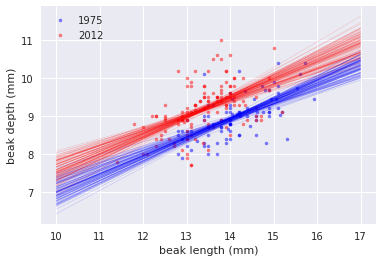

In [19]:
# Make scatter plot of 1975 data
_ = plt.plot(bl_1975, bd_1975, marker='.',
             linestyle='none', color='blue', alpha=0.5)

# Make scatter plot of 2012 data
_ = plt.plot(bl_2012, bd_2012, marker='.',
             linestyle='none', color='red', alpha=0.5)

# Label axes and make legend
_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

# Generate x-values for bootstrap lines: x
x = np.array([10, 17])

# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps_1975[i]*x +bs_intercept_reps_1975[i],
             linewidth=0.5, alpha=0.2, color='blue')
    plt.plot(x, bs_slope_reps_2012[i]*x + bs_intercept_reps_2012[i],
             linewidth=0.5, alpha=0.2, color='red')

# Draw the plot again
plt.show()

<b>Beak length to depth ratio</b>

The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

In [20]:
# Compute length-to-depth ratios
ratio_1975 = bl_1975/bd_1975
ratio_2012 = bl_2012/bd_2012

# Compute means
mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

# Generate bootstrap replicates of the means
bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, size=10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, size=10000)

# Compute the 99% confidence intervals
conf_int_1975 = np.percentile(bs_replicates_1975,[0.5,99.5])
conf_int_2012 = np.percentile(bs_replicates_2012,[0.5,99.5])

# Print the results
print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55698729 1.60118809]
2012: mean ratio = 1.4658342276847767 conf int = [1.44335862 1.48783791]


In the last exercise, you showed that the mean beak length to depth ratio was 1.58 in 1975 and 1.47 in 2012. The low end of the 1975 99% confidence interval was 1.56 mm and the high end of the 99% confidence interval in 2012 was 1.49 mm. In addition to these results, what would you say about the ratio of beak length to depth?

<u>The mean beak length-to-depth ratio decreased by about 0.1, or 7%, from 1975 to 2012. The 99% confidence intervals are not even close to overlapping, so this is a real change. The beak shape changed.</u>

Yes! When the confidence intervals are not even close to overlapping, the effect is much bigger than variation. You can do a p-value, but the result is already clear.

<b>EDA of heritability</b>

The array bd_parent_scandens contains the average beak depth (in mm) of two parents of the species G. scandens. The array bd_offspring_scandens contains the average beak depth of the offspring of the respective parents. The arrays bd_parent_fortis and bd_offspring_fortis contain the same information about measurements from G. fortis birds.

Make a scatter plot of the average offspring beak depth (y-axis) versus average parental beak depth (x-axis) for both species. Use the alpha=0.5 keyword argument to help you see overlapping points.

In [21]:
bd_parent_scandens = np.array([  8.3318,   8.4035,   8.5317,   8.7202,   8.7089,   8.7541,
         8.773 ,   8.8107,   8.7919,   8.8069,   8.6523,   8.6146,
         8.6938,   8.7127,   8.7466,   8.7504,   8.7805,   8.7428,
         8.7164,   8.8032,   8.8258,   8.856 ,   8.9012,   8.9125,
         8.8635,   8.8258,   8.8522,   8.8974,   8.9427,   8.9879,
         8.9615,   8.9238,   8.9351,   9.0143,   9.0558,   9.0596,
         8.9917,   8.905 ,   8.9314,   8.9465,   8.9879,   8.9804,
         9.0219,   9.052 ,   9.0407,   9.0407,   8.9955,   8.9992,
         8.9992,   9.0747,   9.0747,   9.5385,   9.4781,   9.4517,
         9.3537,   9.2707,   9.1199,   9.1689,   9.1425,   9.135 ,
         9.1011,   9.1727,   9.2217,   9.2255,   9.2821,   9.3235,
         9.3198,   9.3198,   9.3198,   9.3273,   9.3725,   9.3989,
         9.4253,   9.4593,   9.4442,   9.4291,   9.2632,   9.2293,
         9.1878,   9.1425,   9.1275,   9.1802,   9.1765,   9.2481,
         9.2481,   9.1991,   9.1689,   9.1765,   9.2406,   9.3198,
         9.3235,   9.1991,   9.2971,   9.2443,   9.316 ,   9.2934,
         9.3914,   9.3989,   9.5121,   9.6176,   9.5535,   9.4668,
         9.3725,   9.3348,   9.3763,   9.3839,   9.4216,   9.4065,
         9.3348,   9.4442,   9.4367,   9.5083,   9.448 ,   9.4781,
         9.595 ,   9.6101,   9.5686,   9.6365,   9.7119,   9.8213,
         9.825 ,   9.7609,   9.6516,   9.5988,   9.546 ,   9.6516,
         9.7572,   9.8854,  10.0023,   9.3914])

bd_offspring_scandens = np.array([  8.419 ,   9.2468,   8.1532,   8.0089,   8.2215,   8.3734,
         8.5025,   8.6392,   8.7684,   8.8139,   8.7911,   8.9051,
         8.9203,   8.8747,   8.943 ,   9.0038,   8.981 ,   9.0949,
         9.2696,   9.1633,   9.1785,   9.1937,   9.2772,   9.0722,
         8.9658,   8.9658,   8.5025,   8.4949,   8.4949,   8.5633,
         8.6013,   8.6468,   8.1532,   8.3734,   8.662 ,   8.6924,
         8.7456,   8.8367,   8.8595,   8.9658,   8.9582,   8.8671,
         8.8671,   8.943 ,   9.0646,   9.1405,   9.2089,   9.2848,
         9.3759,   9.4899,   9.4519,   8.1228,   8.2595,   8.3127,
         8.4949,   8.6013,   8.4646,   8.5329,   8.7532,   8.8823,
         9.0342,   8.6392,   8.6772,   8.6316,   8.7532,   8.8291,
         8.8975,   8.9734,   9.0494,   9.1253,   9.1253,   9.1253,
         9.1785,   9.2848,   9.4595,   9.3608,   9.2089,   9.2544,
         9.3684,   9.3684,   9.2316,   9.1709,   9.2316,   9.0342,
         8.8899,   8.8291,   8.981 ,   8.8975,  10.4089,  10.1886,
         9.7633,   9.7329,   9.6114,   9.5051,   9.5127,   9.3684,
         9.6266,   9.5354,  10.0215,  10.0215,   9.6266,   9.6038,
         9.4063,   9.2316,   9.338 ,   9.262 ,   9.262 ,   9.4063,
         9.4367,   9.0342,   8.943 ,   8.9203,   8.7835,   8.7835,
         9.057 ,   8.9354,   8.8975,   8.8139,   8.8671,   9.0873,
         9.2848,   9.2392,   9.2924,   9.4063,   9.3152,   9.4899,
         9.5962,   9.6873,   9.5203,   9.6646])

In [22]:
bd_parent_fortis = np.array([ 10.1  ,   9.55 ,   9.4  ,  10.25 ,  10.125,   9.7  ,   9.05 ,
         7.4  ,   9.   ,   8.65 ,   9.625,   9.9  ,   9.55 ,   9.05 ,
         8.35 ,  10.1  ,  10.1  ,   9.9  ,  10.225,  10.   ,  10.55 ,
        10.45 ,   9.2  ,  10.2  ,   8.95 ,  10.05 ,  10.2  ,   9.5  ,
         9.925,   9.95 ,  10.05 ,   8.75 ,   9.2  ,  10.15 ,   9.8  ,
        10.7  ,  10.5  ,   9.55 ,  10.55 ,  10.475,   8.65 ,  10.7  ,
         9.1  ,   9.4  ,  10.3  ,   9.65 ,   9.5  ,   9.7  ,  10.525,
         9.95 ,  10.1  ,   9.75 ,  10.05 ,   9.9  ,  10.   ,   9.1  ,
         9.45 ,   9.25 ,   9.5  ,  10.   ,  10.525,   9.9  ,  10.4  ,
         8.95 ,   9.4  ,  10.95 ,  10.75 ,  10.1  ,   8.05 ,   9.1  ,
         9.55 ,   9.05 ,  10.2  ,  10.   ,  10.55 ,  10.75 ,   8.175,
         9.7  ,   8.8  ,  10.75 ,   9.3  ,   9.7  ,   9.6  ,   9.75 ,
         9.6  ,  10.45 ,  11.   ,  10.85 ,  10.15 ,  10.35 ,  10.4  ,
         9.95 ,   9.1  ,  10.1  ,   9.85 ,   9.625,   9.475,   9.   ,
         9.25 ,   9.1  ,   9.25 ,   9.2  ,   9.95 ,   8.65 ,   9.8  ,
         9.4  ,   9.   ,   8.55 ,   8.75 ,   9.65 ,   8.95 ,   9.15 ,
         9.85 ,  10.225,   9.825,  10.   ,   9.425,  10.4  ,   9.875,
         8.95 ,   8.9  ,   9.35 ,  10.425,  10.   ,  10.175,   9.875,
         9.875,   9.15 ,   9.45 ,   9.025,   9.7  ,   9.7  ,  10.05 ,
        10.3  ,   9.6  ,  10.   ,   9.8  ,  10.05 ,   8.75 ,  10.55 ,
         9.7  ,  10.   ,   9.85 ,   9.8  ,   9.175,   9.65 ,   9.55 ,
         9.9  ,  11.55 ,  11.3  ,  10.4  ,  10.8  ,   9.8  ,  10.45 ,
        10.   ,  10.75 ,   9.35 ,  10.75 ,   9.175,   9.65 ,   8.8  ,
        10.55 ,  10.675,   9.95 ,   9.55 ,   8.825,   9.7  ,   9.85 ,
         9.8  ,   9.55 ,   9.275,  10.325,   9.15 ,   9.35 ,   9.15 ,
         9.65 ,  10.575,   9.975,   9.55 ,   9.2  ,   9.925,   9.2  ,
         9.3  ,   8.775,   9.325,   9.175,   9.325,   8.975,   9.7  ,
         9.5  ,  10.225,  10.025,   8.2  ,   8.2  ,   9.55 ,   9.05 ,
         9.6  ,   9.6  ,  10.15 ,   9.875,  10.485,  11.485,  10.985,
         9.7  ,   9.65 ,   9.35 ,  10.05 ,  10.1  ,   9.9  ,   8.95 ,
         9.3  ,   9.95 ,   9.45 ,   9.5  ,   8.45 ,   8.8  ,   8.525,
         9.375,  10.2  ,   7.625,   8.375,   9.25 ,   9.4  ,  10.55 ,
         8.9  ,   8.8  ,   9.   ,   8.575,   8.575,   9.6  ,   9.375,
         9.6  ,   9.95 ,   9.6  ,  10.2  ,   9.85 ,   9.625,   9.025,
        10.375,  10.25 ,   9.3  ,   9.5  ,   9.55 ,   8.55 ,   9.05 ,
         9.9  ,   9.8  ,   9.75 ,  10.25 ,   9.1  ,   9.65 ,  10.3  ,
         8.9  ,   9.95 ,   9.5  ,   9.775,   9.425,   7.75 ,   7.55 ,
         9.1  ,   9.6  ,   9.575,   8.95 ,   9.65 ,   9.65 ,   9.65 ,
         9.525,   9.85 ,   9.05 ,   9.3  ,   8.9  ,   9.45 ,  10.   ,
         9.85 ,   9.25 ,  10.1  ,   9.125,   9.65 ,   9.1  ,   8.05 ,
         7.4  ,   8.85 ,   9.075,   9.   ,   9.7  ,   8.7  ,   9.45 ,
         9.7  ,   8.35 ,   8.85 ,   9.7  ,   9.45 ,  10.3  ,  10.   ,
        10.45 ,   9.45 ,   8.5  ,   8.3  ,  10.   ,   9.225,   9.75 ,
         9.15 ,   9.55 ,   9.   ,   9.275,   9.35 ,   8.95 ,   9.875,
         8.45 ,   8.6  ,   9.7  ,   8.55 ,   9.05 ,   9.6  ,   8.65 ,
         9.2  ,   8.95 ,   9.6  ,   9.15 ,   9.4  ,   8.95 ,   9.95 ,
        10.55 ,   9.7  ,   8.85 ,   8.8  ,  10.   ,   9.05 ,   8.2  ,
         8.1  ,   7.25 ,   8.3  ,   9.15 ,   8.6  ,   9.5  ,   8.05 ,
         9.425,   9.3  ,   9.8  ,   9.3  ,   9.85 ,   9.5  ,   8.65 ,
         9.825,   9.   ,  10.45 ,   9.1  ,   9.55 ,   9.05 ,  10.   ,
         9.35 ,   8.375,   8.3  ,   8.8  ,  10.1  ,   9.5  ,   9.75 ,
        10.1  ,   9.575,   9.425,   9.65 ,   8.725,   9.025,   8.5  ,
         8.95 ,   9.3  ,   8.85 ,   8.95 ,   9.8  ,   9.5  ,   8.65 ,
         9.1  ,   9.4  ,   8.475,   9.35 ,   7.95 ,   9.35 ,   8.575,
         9.05 ,   8.175,   9.85 ,   7.85 ,   9.85 ,  10.1  ,   9.35 ,
         8.85 ,   8.75 ,   9.625,   9.25 ,   9.55 ,  10.325,   8.55 ,
         9.675,   9.15 ,   9.   ,   9.65 ,   8.6  ,   8.8  ,   9.   ,
         9.95 ,   8.4  ,   9.35 ,  10.3  ,   9.05 ,   9.975,   9.975,
         8.65 ,   8.725,   8.2  ,   7.85 ,   8.775,   8.5  ,   9.4  ])

bd_offspring_fortis = np.array([ 10.7 ,   9.78,   9.48,   9.6 ,  10.27,   9.5 ,   9.  ,   7.46,
         7.65,   8.63,   9.81,   9.4 ,   9.48,   8.75,   7.6 ,  10.  ,
        10.09,   9.74,   9.64,   8.49,  10.15,  10.28,   9.2 ,  10.01,
         9.03,   9.94,  10.5 ,   9.7 ,  10.02,  10.04,   9.43,   8.1 ,
         9.5 ,   9.9 ,   9.48,  10.18,  10.16,   9.08,  10.39,   9.9 ,
         8.4 ,  10.6 ,   8.75,   9.46,   9.6 ,   9.6 ,   9.95,  10.05,
        10.16,  10.1 ,   9.83,   9.46,   9.7 ,   9.82,  10.34,   8.02,
         9.65,   9.87,   9.  ,  11.14,   9.25,   8.14,  10.23,   8.7 ,
         9.8 ,  10.54,  11.19,   9.85,   8.1 ,   9.3 ,   9.34,   9.19,
         9.52,   9.36,   8.8 ,   8.6 ,   8.  ,   8.5 ,   8.3 ,  10.38,
         8.54,   8.94,  10.  ,   9.76,   9.45,   9.89,  10.9 ,   9.91,
         9.39,   9.86,   9.74,   9.9 ,   9.09,   9.69,  10.24,   8.9 ,
         9.67,   8.93,   9.3 ,   8.67,   9.15,   9.23,   9.59,   9.03,
         9.58,   8.97,   8.57,   8.47,   8.71,   9.21,   9.13,   8.5 ,
         9.58,   9.21,   9.6 ,   9.32,   8.7 ,  10.46,   9.29,   9.24,
         9.45,   9.35,  10.19,   9.91,   9.18,   9.89,   9.6 ,  10.3 ,
         9.45,   8.79,   9.2 ,   8.8 ,   9.69,  10.61,   9.6 ,   9.9 ,
         9.26,  10.2 ,   8.79,   9.28,   8.83,   9.76,  10.2 ,   9.43,
         9.4 ,   9.9 ,   9.5 ,   8.95,   9.98,   9.72,   9.86,  11.1 ,
         9.14,  10.49,   9.75,  10.35,   9.73,   9.83,   8.69,   9.58,
         8.42,   9.25,  10.12,   9.31,   9.99,   8.59,   8.74,   8.79,
         9.6 ,   9.52,   8.93,  10.23,   9.35,   9.35,   9.09,   9.04,
         9.75,  10.5 ,   9.09,   9.05,   9.54,   9.3 ,   9.06,   8.7 ,
         9.32,   8.4 ,   8.67,   8.6 ,   9.53,   9.77,   9.65,   9.43,
         8.35,   8.26,   9.5 ,   8.6 ,   9.57,   9.14,  10.79,   8.91,
         9.93,  10.7 ,   9.3 ,   9.93,   9.51,   9.44,  10.05,  10.13,
         9.24,   8.21,   8.9 ,   9.34,   8.77,   9.4 ,   8.82,   8.83,
         8.6 ,   9.5 ,  10.2 ,   8.09,   9.07,   9.29,   9.1 ,  10.19,
         9.25,   8.98,   9.02,   8.6 ,   8.25,   8.7 ,   9.9 ,   9.65,
         9.45,   9.38,  10.4 ,   9.96,   9.46,   8.26,  10.05,   8.92,
         9.5 ,   9.43,   8.97,   8.44,   8.92,  10.3 ,   8.4 ,   9.37,
         9.91,  10.  ,   9.21,   9.95,   8.84,   9.82,   9.5 ,  10.29,
         8.4 ,   8.31,   9.29,   8.86,   9.4 ,   9.62,   8.62,   8.3 ,
         9.8 ,   8.48,   9.61,   9.5 ,   9.37,   8.74,   9.31,   9.5 ,
         9.49,   9.74,   9.2 ,   9.24,   9.7 ,   9.64,   9.2 ,   7.5 ,
         7.5 ,   8.7 ,   8.31,   9.  ,   9.74,   9.31,  10.5 ,   9.3 ,
         8.12,   9.34,   9.72,   9.  ,   9.65,   9.9 ,  10.  ,  10.1 ,
         8.  ,   9.07,   9.75,   9.33,   8.11,   9.36,   9.74,   9.9 ,
         9.23,   9.7 ,   8.2 ,   9.35,   9.49,   9.34,   8.87,   9.03,
         9.07,   9.43,   8.2 ,   9.19,   9.  ,   9.2 ,   9.06,   9.81,
         8.89,   9.4 ,  10.45,   9.64,   9.03,   8.71,   9.91,   8.33,
         8.2 ,   7.83,   7.14,   8.91,   9.18,   8.8 ,   9.9 ,   7.73,
         9.25,   8.7 ,   9.5 ,   9.3 ,   9.05,  10.18,   8.85,   9.24,
         9.15,   9.98,   8.77,   9.8 ,   8.65,  10.  ,   8.81,   8.01,
         7.9 ,   9.41,  10.18,   9.55,   9.08,   8.4 ,   9.75,   8.9 ,
         9.07,   9.35,   8.9 ,   8.19,   8.65,   9.19,   8.9 ,   9.28,
        10.58,   9.  ,   9.4 ,   8.91,   9.93,  10.  ,   9.37,   7.4 ,
         9.  ,   8.8 ,   9.18,   8.3 ,  10.08,   7.9 ,   9.96,  10.4 ,
         9.65,   8.8 ,   8.65,   9.7 ,   9.23,   9.43,   9.93,   8.47,
         9.55,   9.28,   8.85,   8.9 ,   8.75,   8.63,   9.  ,   9.43,
         8.28,   9.23,  10.4 ,   9.  ,   9.8 ,   9.77,   8.97,   8.37,
         7.7 ,   7.9 ,   9.5 ,   8.2 ,   8.8 ])

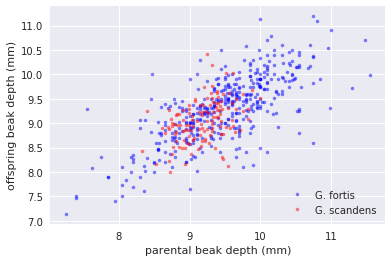

In [23]:
# Make scatter plots
_ = plt.plot(bd_parent_fortis, bd_offspring_fortis,
             marker='.', linestyle='none', color='blue', alpha=0.5)
_ = plt.plot(bd_parent_scandens, bd_offspring_scandens,
             marker='.', linestyle='none', color='red', alpha=0.5)

# Label axes
_ = plt.xlabel('parental beak depth (mm)')
_ = plt.ylabel('offspring beak depth (mm)')

# Add legend
_ = plt.legend(('G. fortis', 'G. scandens'), loc='lower right')

# Show plot
plt.show()

It appears as though there is a stronger correlation in G. fortis than in G. scandens. This suggests that beak depth is more strongly inherited in G. fortis. We'll quantify this correlation next.

<b>Correlation of offspring and parental data</b>

In an effort to quantify the correlation between offspring and parent beak depths, we would like to compute statistics, such as the Pearson correlation coefficient, between parents and offspring. To get confidence intervals on this, we need to do a pairs bootstrap.

You have already written a function to do pairs bootstrap to get estimates for parameters derived from linear regression. Your task in this exercise is to modify that function to make a new function with call signature draw_bs_pairs(x, y, func, size=1) that performs pairs bootstrap and computes a single statistic on the pairs samples defined by func(bs_x, bs_y). In the next exercise, you will use pearson_r for func.

In [24]:
def draw_bs_pairs(x, y, func, size=1):
    """Perform pairs bootstrap for a given function."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        
        bs_replicates = func(bs_x, bs_y)

    return bs_replicates

<b>Pearson correlation of offspring and parental data</b>
    
The Pearson correlation coefficient seems like a useful measure of how strongly the beak depth of parents are inherited by their offspring. Compute the Pearson correlation coefficient between parental and offspring beak depths for G. scandens. Do the same for G. fortis. Then, use the function you wrote in the last exercise to compute a 95% confidence interval using pairs bootstrap.

In [25]:
# Compute the Pearson correlation coefficients
r_scandens = pearson_r(bd_parent_scandens, bd_offspring_scandens)
r_fortis = pearson_r(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of Pearson r
bs_replicates_scandens = draw_bs_pairs(bd_parent_scandens, bd_offspring_scandens, pearson_r, 1000)
bs_replicates_fortis = draw_bs_pairs(bd_parent_fortis, bd_offspring_fortis, pearson_r, 1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(bs_replicates_scandens, [2.5,97.5])
conf_int_fortis = np.percentile(bs_replicates_fortis, [2.5,97.5])

# Print results
print('G. scandens:', r_scandens, conf_int_scandens)
print('G. fortis:', r_fortis, conf_int_fortis)

G. scandens: 0.4117063629401258 [0.5519585 0.5519585]
G. fortis: 0.7283412395518484 [0.76406407 0.76406407]


It is clear from the confidence intervals that beak depth of the offspring of G. fortis parents is more strongly correlated with their offspring than their G. scandens counterparts.

<b>Measuring heritability</b>

Remember that the Pearson correlation coefficient is the ratio of the covariance to the geometric mean of the variances of the two data sets. This is a measure of the correlation between parents and offspring, but might not be the best estimate of heritability. If we stop and think, it makes more sense to define heritability as the ratio of the covariance between parent and offspring to the variance of the parents alone. In this exercise, you will estimate the heritability and perform a pairs bootstrap calculation to get the 95% confidence interval.

This exercise highlights a very important point. Statistical inference (and data analysis in general) is not a plug-n-chug enterprise. You need to think carefully about the questions you are seeking to answer with your data and analyze them appropriately. If you are interested in how heritable traits are, the quantity we defined as the heritability is more apt than the off-the-shelf statistic, the Pearson correlation coefficient.

In [26]:
def heritability(parents, offspring):
    """Compute the heritability from parent and offspring samples."""
    covariance_matrix = np.cov(parents, offspring)
    return covariance_matrix[0,1] / covariance_matrix[0,0]

# Compute the heritability
heritability_scandens = heritability(bd_parent_scandens, bd_offspring_scandens)
heritability_fortis = heritability(bd_parent_fortis, bd_offspring_fortis)

# Acquire 1000 bootstrap replicates of heritability
replicates_scandens = draw_bs_pairs(
        bd_parent_scandens, bd_offspring_scandens, heritability, size=1000)
        
replicates_fortis = draw_bs_pairs(
        bd_parent_fortis, bd_offspring_fortis, heritability, size=1000)


# Compute 95% confidence intervals
conf_int_scandens = np.percentile(replicates_scandens, [2.5, 97.5])
conf_int_fortis = np.percentile(replicates_fortis, [2.5, 97.5])

# Print results
print('G. scandens:', heritability_scandens, conf_int_scandens)
print('G. fortis:', heritability_fortis, conf_int_fortis)

G. scandens: 0.5485340868685982 [0.45735928 0.45735928]
G. fortis: 0.7229051911438156 [0.75584237 0.75584237]


Here again, we see that G. fortis has stronger heritability than G. scandens. This suggests that the traits of G. fortis may be strongly incorporated into G. scandens by introgressive hybridization.

<b>Is beak depth heritable at all in G. scandens?</b>

The heritability of beak depth in G. scandens seems low. It could be that this observed heritability was just achieved by chance and beak depth is actually not really heritable in the species. You will test that hypothesis here. To do this, you will do a pairs permutation test.

In [27]:
# Initialize array of replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute parent beak depths
    bd_parent_permuted = np.random.permutation(bd_parent_scandens)
    perm_replicates[i] = heritability(bd_parent_permuted, bd_offspring_scandens)


# Compute p-value: p
p = np.sum(perm_replicates >= heritability_scandens) / len(perm_replicates)

# Print the p-value
print('p-val =', p)

p-val = 0.0


You get a p-value of zero, which means that none of the 10,000 permutation pairs replicates you drew had a heritability high enough to match that which was observed. This strongly suggests that beak depth is heritable in G. scandens, just not as much as in G. fortis. If you like, you can plot a histogram of the heritability replicates to get a feel for how extreme of a value of heritability you might expect by chance.

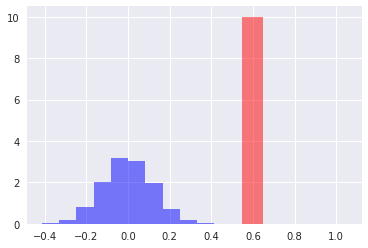

In [32]:
plt.hist(perm_replicates, bins = 10, density=True, facecolor='blue', alpha = 0.5)
plt.hist(heritability_scandens, bins = 10, density=True, facecolor='red', alpha = 0.5)

plt.show()